In [117]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import seaborn as sns
import re
from os import path
from glob import glob
from tqdm import tqdm
import numpy as np
from matplotlib import cm
from pprint import pprint

In [118]:
ROOT_PATH = '\\\\CILab_NAS_Data/homes/inchang/PuzzlePCG/ProxyPlayer'

In [119]:
files = glob(path.join(ROOT_PATH, '*', 'MatchResult_*.csv'))


In [120]:
StatisticsColumns = [
    'ReachedKnowledgeStep',
    #'AlmostReachedKnowledgeStep',
    'Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece']

In [121]:
replacements = {
    'met': 'method',
    'pla': 'player',
    'eff': 'simpleEffect',
    'obj': 'objective',
    'sim': 'simulation',
    'rat': 'almostRatio',
    'pdep': 'playerDepth',
}

def parse_filename(data):
    result = dict()
    for i in range(0, len(data), 2):
        if data[i] in replacements.keys():
            data[i] = replacements[data[i]]

        result[data[i]] = data[i+1]

    return result

dfs = []
for file_path in tqdm(files):
    # print(file_path)
    file_name = path.basename(file_path)

    _file_name = file_name.split('_')[1:-1]
    args = parse_filename(_file_name)

    df = pd.read_csv(file_path)

    for key, value in args.items():
        df[key] = value
    dfs.append(df)

original_df = pd.concat(dfs)

original_df['Sum_Matched'] = original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']  + \
    original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece'] + original_df['Matched_HorizontalPiece']
original_df.loc[original_df['method'] == 'random', 'simulation'] = 0

original_df['simpleEffect'] = original_df['simpleEffect'].replace(np.nan, 0)
original_df['objective'] = original_df['objective'].replace(np.nan, '-')
original_df['playerDepth'] = original_df['playerDepth'].replace(np.nan, '1')
original_df.loc[original_df['method'] == 'random', 'playerDepth'] = '-'
original_df.loc[original_df['method'] == 'random', 'simulation'] = '-'
original_df.loc[original_df['method'] == 'random', 'almostRatio'] = '-'

original_df.to_csv('original_df.csv')

In [122]:
original_df = pd.read_csv('original_df.csv')

C:\ProgramData\Anaconda3\envs\PCG-MLAgents\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [123]:
original_df.head()

,Unnamed: 0,EpisodeCount,StepCount,Time,InstanceUUID,SettleCount,ChangedCount,MeanComparisonCount,StdComparisonCount,ReachedKnowledgeStep,...,Target_BombPiece,Target_RainbowPiece,method,player,simpleEffect,objective,simulation,almostRatio,playerDepth,Sum_Matched
0,0,1,300,2023-05-21 04:18:54.310,7c6ae160,0,213,0.860000,0.669748,-1,...,2,3,mcts,0,1,knowledge,100,0.75,1,486
1,1,2,303,2023-05-21 04:21:26.273,7c6ae160,0,223,0.947195,0.712135,117,...,2,3,mcts,0,1,knowledge,100,0.75,1,414
2,2,3,300,2023-05-21 04:23:38.134,7c6ae160,0,234,0.913333,0.611338,94,...,2,3,mcts,0,1,knowledge,100,0.75,1,456
3,3,4,301,2023-05-21 04:25:35.225,7c6ae160,0,201,0.784053,0.640217,86,...,2,3,mcts,0,1,knowledge,100,0.75,1,354
4,4,5,301,2023-05-21 04:27:34.357,7c6ae160,0,203,0.790698,0.657809,121,...,2,3,mcts,0,1,knowledge,100,0.75,1,378


In [124]:
original_df.columns.values.tolist()

['Unnamed: 0',
 'EpisodeCount',
 'StepCount',
 'Time',
 'InstanceUUID',
 'SettleCount',
 'ChangedCount',
 'MeanComparisonCount',
 'StdComparisonCount',
 'ReachedKnowledgeStep',
 'Q1ReachedKnowledgeStep',
 'Q2ReachedKnowledgeStep',
 'Q3ReachedKnowledgeStep',
 'Matched_HorizontalPiece',
 'Matched_VerticalPiece',
 'Matched_CrossPiece',
 'Matched_RocketPiece',
 'Matched_BombPiece',
 'Matched_RainbowPiece',
 'Target_HorizontalPiece',
 'Target_VerticalPiece',
 'Target_CrossPiece',
 'Target_RocketPiece',
 'Target_BombPiece',
 'Target_RainbowPiece',
 'method',
 'player',
 'simpleEffect',
 'objective',
 'simulation',
 'almostRatio',
 'playerDepth',
 'Sum_Matched']

In [125]:
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result


C:\ProgramData\Anaconda3\envs\PCG-MLAgents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
1      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
2      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
       random -         -           -           -             500   
3      mcts   knowledge 1           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           500   
                        2           0.75        100           500   
                                                200           500   
                                                400           500   
                                    1.0         100           500   
                                                200           500   
                                                400           268   
                                                400           232   
       random -         -           -           -             500   

                                                           Q1ReachedKnowledgeStep  \
                                                                             mean   
player method objective 

In [126]:
original_df = original_df[
    (original_df['ReachedKnowledgeStep'] != -1) &
    (original_df['Q1ReachedKnowledgeStep'] != -1) &
    (original_df['Q2ReachedKnowledgeStep'] != -1) &
    (original_df['Q3ReachedKnowledgeStep'] != -1)
]

In [127]:
match_result = original_df.groupby(['player', 'method', 'objective', 'playerDepth', 'almostRatio', 'simulation'])[
                                      'method',
                                      'Matched_HorizontalPiece',
                                      'Matched_VerticalPiece',
                                      'Matched_CrossPiece',
                                      'Matched_RocketPiece',
                                      'Matched_BombPiece',
                                      'Matched_RainbowPiece',
                                      #'AlmostReachedKnowledgeStep',
                                      'Q1ReachedKnowledgeStep',
                                      'Q2ReachedKnowledgeStep',
                                      'Q3ReachedKnowledgeStep',
                                      'ReachedKnowledgeStep',
                                      'Sum_Matched'].agg(
    {
        'method': ['count'],
        #'AlmostReachedKnowledgeStep': ['mean'],
        'Q1ReachedKnowledgeStep': ['mean'],
        'Q2ReachedKnowledgeStep': ['mean'],
        'Q3ReachedKnowledgeStep': ['mean'],
        'ReachedKnowledgeStep': ['mean'],
        'Matched_HorizontalPiece':['mean'],
        'Matched_VerticalPiece':['mean'],
        'Matched_CrossPiece':['mean'],
        'Matched_RocketPiece':['mean'],
        'Matched_BombPiece':['mean'],
        'Matched_RainbowPiece':['mean'],
        'Sum_Matched':['mean'],
     }
)
match_result

C:\ProgramData\Anaconda3\envs\PCG-MLAgents\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


method  \
                                                            count   
player method objective playerDepth almostRatio simulation          
0      mcts   knowledge 1           0.75        100           485   
                                                200           484   
                                                400           491   
                                    1.0         100           477   
                                                200           482   
                                                400           492   
                        2           0.75        100           485   
                                                200           485   
                                                400           487   
                                    1.0         100           483   
                                                200           486   
                                                400           482   
       random -         -           -           -             414   
1      mcts   knowledge 1           0.75        100           449   
                                                200           444   
                                                400           444   
                                    1.0         100           440   
                                                200           453   
                                                400           453   
                        2           0.75        100           462   
                                                200           440   
                                                400           449   
                                    1.0         100           436   
                                                200           461   
                                                400           446   
       random -         -           -           -             261   
2      mcts   knowledge 1           0.75        100           430   
                                                200           453   
                                                400           457   
                                    1.0         100           447   
                                                200           473   
                                                400           456   
                        2           0.75        100           441   
                                                200           439   
                                                400           446   
                                    1.0         100           425   
                                                200           449   
                                                400           450   
       random -         -           -           -             334   
3      mcts   knowledge 1           0.75        100           448   
                                                200           462   
                                                400           463   
                                    1.0         100           463   
                                                200           451   
                                                400           460   
                        2           0.75        100           448   
                                                200           456   
                                                400           454   
                                    1.0         100           445   
                                                200           456   
                                                400           245   
                                                400           219   
       random -         -           -           -             308   

                                                           Q1ReachedKnowledgeStep  \
                                                                             mean   
player method objective 

In [128]:
def get_legend_name(x):
    if x['method'] == 'mcts':
        if x['objective'] == 'score':
            return f"{x['method']}_{x['objective']}_{x['simulation']}_{x['playerDepth']}"
        elif x['objective'] == 'knowledge':
            return f"{x['method']}_{x['objective']}_{x['almostRatio']}_{x['simulation']}_{x['playerDepth']}"
    else:
        return f"{x['method']}"

melted_df = original_df.copy()

melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation', 'player']).sample(n=100, random_state=1)
melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
pprint(set(melted_df['concat_method']))
# Display Target
melted_df = melted_df[melted_df['concat_method'].isin(['random',
                                                       'mcts_knowledge_1.0_400_1',
                                                       'mcts_knowledge_0.75_400_1',
                                                       'mcts_knowledge_1.0_400_2',
                                                       'mcts_knowledge_0.75_400_2',
                                                       'mcts_score_400_2'])]

plt.figure(figsize=(7, 5))
melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                    value_vars=[*StatisticsColumns], ignore_index=False)

melted_df['x'] = melted_df['variable']
# melted_df['x'] = melted_df['x'].str.replace('AlmostReachedKnowledgeStep', 'ar_step')
melted_df['x'] = melted_df['x'].str.replace('ReachedKnowledgeStep', 'r_step')

melted_df['x'] = melted_df['x'].str.replace('Matched_HorizontalPiece', 'b0')
melted_df['x'] = melted_df['x'].str.replace('Matched_VerticalPiece', 'b1')
melted_df['x'] = melted_df['x'].str.replace('Matched_CrossPiece', 'b2')
melted_df['x'] = melted_df['x'].str.replace('Matched_RocketPiece', 'b3')
melted_df['x'] = melted_df['x'].str.replace('Matched_BombPiece', 'b4')
melted_df['x'] = melted_df['x'].str.replace('Matched_RainbowPiece', 'b5')

ax = sns.boxplot(x="x", y="value", hue="player", data=melted_df)
plt.xticks(rotation=45)

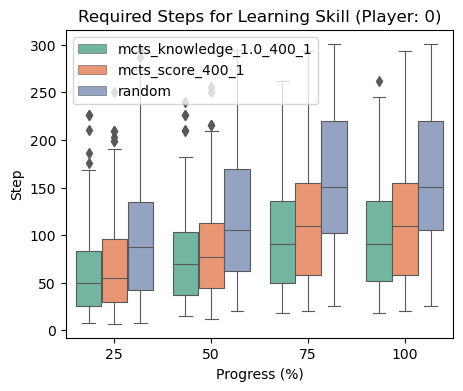

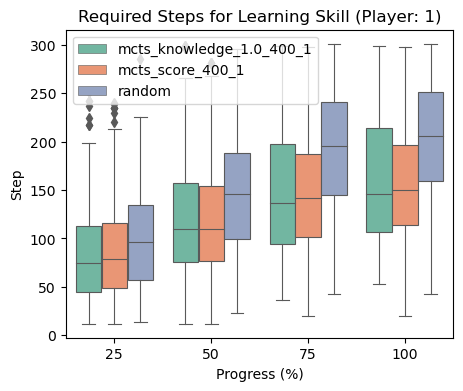

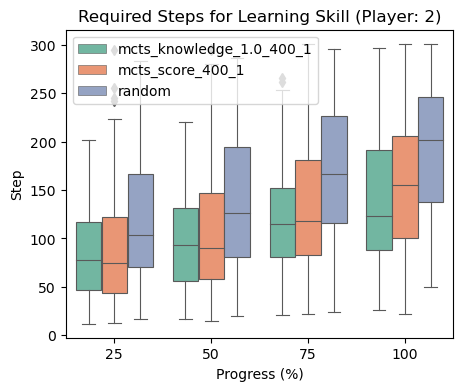

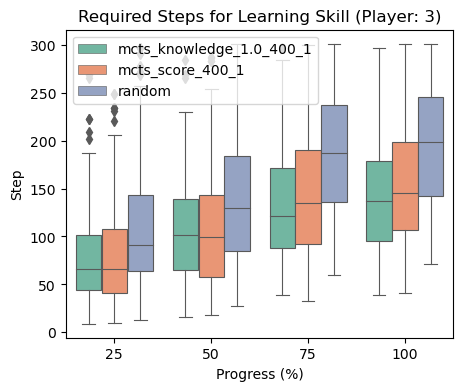

In [199]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75'
    }, inplace=True)

    _columns = [
    '25', '50', '75', '100',
    # Matched_HorizontalPiece', 'Matched_VerticalPiece', 'Matched_CrossPiece', 'Matched_RocketPiece', 'Matched_BombPiece', 'Matched_RainbowPiece'
    ]

    # print(player_df.keys())
    sns.set_palette('Set2')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        #
        # 'mcts_knowledge_0.75_400_1',
        'mcts_knowledge_1.0_400_1',
        'mcts_score_400_1',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, dodge=True, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Required Steps for Learning Skill (Player: {player_no})')
    ax.set_xlabel('Progress (%)')
    ax.set_ylabel('Step')
    plt.savefig(f'./figures/learning_steps_p{player_no}', dpi=300)
    plt.show()

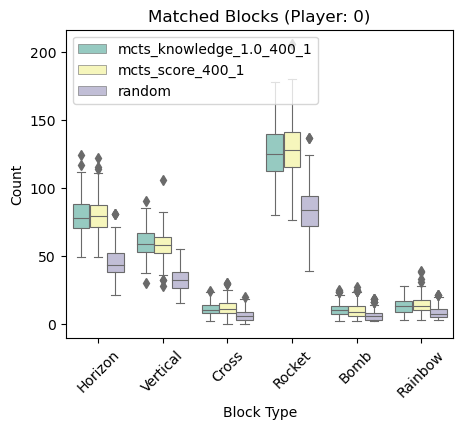

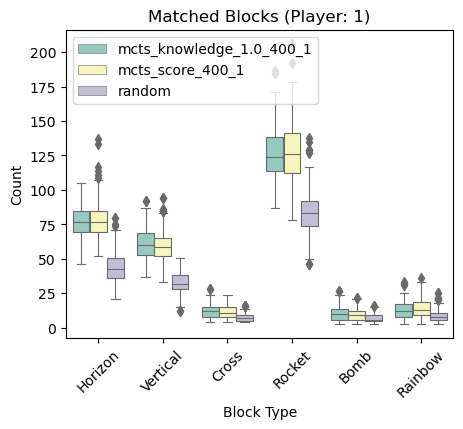

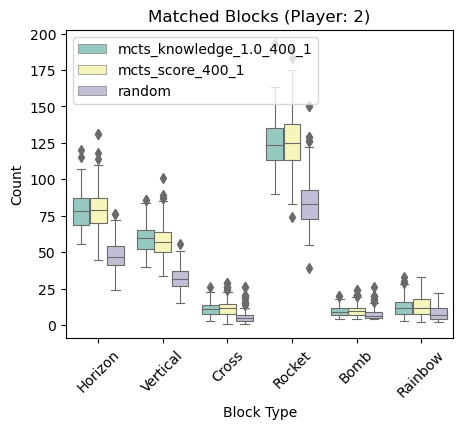

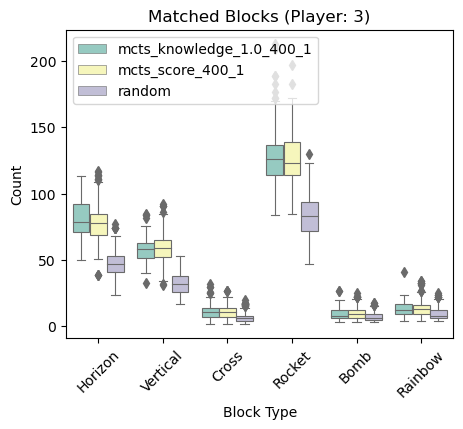

In [200]:
for player_no in range(0, 4):
    player_df = original_df[original_df['player'] == player_no]
    melted_df = player_df.copy()

    melted_df.rename(columns={
        'ReachedKnowledgeStep':'100',
        'Q1ReachedKnowledgeStep':'25',
        'Q2ReachedKnowledgeStep':'50',
        'Q3ReachedKnowledgeStep':'75',
        'Matched_HorizontalPiece':'Horizon',
        'Matched_VerticalPiece':'Vertical',
        'Matched_CrossPiece':'Cross',
        'Matched_RocketPiece':'Rocket',
        'Matched_BombPiece':'Bomb',
        'Matched_RainbowPiece':'Rainbow',

    }, inplace=True)

    _columns = [
    # '25', '50', '75', '100',
    'Horizon', 'Vertical', 'Cross', 'Rocket', 'Bomb', 'Rainbow'
    ]

    # print(player_df.keys())
    sns.set_palette('Set3')
    melted_df = melted_df.groupby(['method', 'objective', 'playerDepth', 'simulation']).sample(n=300, random_state=1, replace=True)
    melted_df['concat_method'] = melted_df.agg(lambda x: get_legend_name(x), axis=1)
    melted_df = pd.melt(melted_df, id_vars=['EpisodeCount', 'objective', 'concat_method', 'simulation', 'player'],
                        value_vars=[*_columns], ignore_index=False)
    # pprint(set(melted_df['concat_method']))
    _methods = [
        #
        # 'mcts_knowledge_0.75_400_1',
        'mcts_knowledge_1.0_400_1',
        'mcts_score_400_1',
        'random'
    ]
    melted_df = melted_df[melted_df['concat_method'].isin(_methods)]

    plt.figure(figsize=(5, 4))
    plt.clf()
    ax = sns.boxplot(x="variable", y="value", hue="concat_method", data=melted_df, linewidth=0.8)

    plt.legend(loc='upper left')
    ax.set_title(f'Matched Blocks (Player: {player_no})')
    ax.set_xlabel('Block Type')
    ax.set_ylabel('Count')
    plt.xticks(rotation=45)
    plt.savefig(f'./figures/block_counts_p{player_no}', dpi=300)
    plt.show()
